## DATA 601 Project-1
### Deadline: November 18, 2024, 23:59pm

## Project Instructions
___

### Instructions
The input_data folder has various csv files related to MD crash data, weather data, total drivers by state and state names.

- MD_Crash_report files are vehicle crash report data obtained from for https://opendata.maryland.gov. These include four data tables on accident crash reports, driver (person) data, emergency medical services (EMS) data, and vehicle data. All tables have a common ID feature called "Report Number". The data includes the following years and quarters:
    - [CY2017Q1](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-CY2017-Quarter-/9886-wded) 
    - [CY2017Q2](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-CY2017-Quarter-/wnvu-hisq)
    - [CY2017Q3](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-CY2017-Quarter-/m6zc-qj6d)
    - [CY2017Q4](https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-CY2017-Quarter-/9tum-d4as)
- States_drivers.csv includes data on total drivers by state.
- States.json includes the state name and abbreviations in case it is needed.

Other documentation:
- Sample __State of Maryland Vehicle Accident Report__ is included in the file "maryland_accident_report.pdf" (source: https://www.nhtsa.gov/sites/nhtsa.gov/files/documents/maryland_0.pdf). This report has several codes that can be used to explain codes in the data.
- The __Maryland Cross Reference Document__ is included in the file "maryland_cross_reference_document.pdf" (source: https://www.nhtsa.gov/sites/nhtsa.gov/files/documents/maryland_cross_reference.pdf). This document may also provide some more details in the codes in the data.
- The __maryland county codes__ is included in the file "MD_County_Codes.pdf" (source: https://mde.maryland.gov/programs/Land/Documents/LeadFactSheets/LeadfsCountyCodes.pdf)

<br>
Document any assumptions that you do as part of a comment or a markdown cell were appropriate. Note that you may change the format of the project as long as the questions are answered.

# Project 1 Questions

### Question 1 (15 points)

Review the questions below to familiarize yourself with the task. After reviewing the questions review the data files of the MD_Crash_Reports of the project and determine if it is worth merging/concatenation/joining and document your reasoning on merging or not merging the crash datafiles that will be used. Question 1 and 2 may be combined for purposes of organizing the Project 1 Jupyter Notebook.

### Question 2 (15 points)
Use the .info(), .describe(), .hist() and sns.pairplot() functions to explore the data. Comment on any observations and identify any features that may be worth plotting and evaluating in more detail. (Note that the last question requires to develop a visualization).

### Question 3 (15 points)
Clean the data as you seem necessary. For example, evaluate remove null or duplicate values. Note there may be features where it may be appropriate to have values that are null or duplicated values. Document your reasoning.

### Question 4 (15 points)
a. For each county, determine the average speed of accidents involving bicyclists. (Note: Take a look at the Sample Maryland Crash Report. Report provides a map of the codes including those involving other bicyclists.) <br>
b. Sort the list the sorted by average speed.

### Question 5 (15 points)
a. Determine the total number of crashes per "vehicle make". Sort the results in alphabetical order by vehicle make (e.g. Chevrolet, Ford, Honda, etc.). <br>
b. Determine average age of the car involved in these accidents for each "vehicle make".

### Question 6 (15 points)
a. Determine all the accidents that happened in a circle centered at (39.197753, -77.263303) with a radius of 5 km.<br>
b. Determine the number of accidents where the speed limit was above 51 miles per hour within the 5 km circle. <br>
c. Determine the number of accidents where the speed limit was below 41 miles per hour within the 5 km circle.  <br>
<br>
Hint: Please see the "P1_Helper_Distance_From_Coordinates.ipynb" that can be found in the Project1 folder.

### Question 7 (15 points)

Determine the number of drivers, who got in a car crash, from non-DMV states and list them by total drivers, female and male. Consollidate the final values in one dataframe. <br>
`St | Drivers | Female | Male ` <br>
`NY | 151034  | 101000 | 50034` <br>
`PA | 125131  | 105000 | 20131` <br>
...


b. Use the states drivers data from the states_drivers.csv to normalize the previous list with number of total drivers for each state. For example, there are 12 million drivers in NY, then the normalized numbers should be:
<br>
`St |  Drivers  | Normalized` <br>
`NY |  151034   | 1.26E-5   ` <br>
`PA |  125131   |....       ` <br>
...

### Question 8 (15 points)
a. On which day of the week (Monday through Sunday) do the most of the crashes happen? <br>
b. On which hour of the day (00 - 24) do the most of the crashes happen?

### Question 9 (15 points)
a. What is the number of accidents that happened on rainy and clear/cloudy days?
b. What is the ration of the number of accidents that happened on rainy days to the number of accidents happened on clear/cloudy days? 
c. Calculate the number of fatal accidents that occur by each light condition.

What does these statistics tell us?

### Question 10 (10 points)
Use matplotlib and/or seaborn and show your talent in data visualization. You are free to visualize anything you want regarding this dataset.

---

# Notebook Start

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#!pip install python-calamine 
#I had to use this line in order to correctly import the .xlsx files

## Importing Datasets

Before we begin our analysis, let's review the different data sets available in our `input_data` folder given for this project

In [2]:
files = os.listdir('C:/Users/peted/OneDrive/Documents/Data/DATA 601/Projects/Project 1/input_data')
files

['geodata',
 'maryland_accident_report.pdf',
 'maryland_cross_reference_document.pdf',
 'MD2020_Rain_Snow.csv',
 'MD_County_Codes.pdf',
 'MD_Crash_Data_2017.xlsx',
 'MD_Crash_EMS_Data_2017.xlsx',
 'MD_Crash_Person_Data_2017.xlsx',
 'MD_Crash_Person_ID_Data_2017.xlsx',
 'MD_Crash_Vehicle_Data_2017.csv',
 'states.json',
 'states_drivers.csv']

Now that we have a list of our files, let's separate the reference materials. We will do this by adding any file that contains the `.pdf` file extension to a seperate list named `ref_files`, and our data files to a list named `data_files`.

In [3]:
ref_files=[]
data_files=[]

for file_name in files:
    if '.pdf' in file_name:
        ref_files.append(file_name)
    else:
        data_files.append(file_name)

print(f"Files that contain our data: {data_files} \nFiles for reference: {ref_files}") 

Files that contain our data: ['geodata', 'MD2020_Rain_Snow.csv', 'MD_Crash_Data_2017.xlsx', 'MD_Crash_EMS_Data_2017.xlsx', 'MD_Crash_Person_Data_2017.xlsx', 'MD_Crash_Person_ID_Data_2017.xlsx', 'MD_Crash_Vehicle_Data_2017.csv', 'states.json', 'states_drivers.csv'] 
Files for reference: ['maryland_accident_report.pdf', 'maryland_cross_reference_document.pdf', 'MD_County_Codes.pdf']


### Converting our Data Files to DataFrame Objects

It appears that there's a mix of 3 different file formats contained in our data files: `.csv`,`.xlsx`, and `.json`. The following code is designed to detect the file extension, then use the corresponding `pd.read` function based on the file type. I added the `%%time` jupyter magic, since it took my computer a while to parse all the files.

In [4]:
%%time

for file in data_files:
    if '.csv' in file:
        file_name=file[:-4]
        print(f'importing {file} as {file_name}')
        globals()[file_name]=pd.read_csv(f'./input_data/{file}')
        print('Done.')
    if '.xlsx' in file:
        file_name=file[:-5]
        print(f'importing {file} as {file_name}')
        globals()[file_name]=pd.read_excel(f'./input_data/{file}', engine='calamine')
        print('Done.')
    if '.json' in file:
        file_name=file[:-5]
        print(f'importing {file} as {file_name}')
        globals()[file_name]=pd.read_json(f'./input_data/{file}')
        print('Done.')

importing MD2020_Rain_Snow.csv as MD2020_Rain_Snow
Done.
importing MD_Crash_Data_2017.xlsx as MD_Crash_Data_2017
Done.
importing MD_Crash_EMS_Data_2017.xlsx as MD_Crash_EMS_Data_2017
Done.
importing MD_Crash_Person_Data_2017.xlsx as MD_Crash_Person_Data_2017
Done.
importing MD_Crash_Person_ID_Data_2017.xlsx as MD_Crash_Person_ID_Data_2017
Done.
importing MD_Crash_Vehicle_Data_2017.csv as MD_Crash_Vehicle_Data_2017
Done.
importing states.json as states
Done.
importing states_drivers.csv as states_drivers
Done.
CPU times: total: 19.8 s
Wall time: 19.9 s


## Defining the Scope of our Analysis

Before we move on, let's refine the questions we're looking to answer, so we can narrow down the exact information we need from these datasets. 

1) For each county, what is the average speed of accidents involving a bicyclist? (Question 4)
2) For each vehicle make, what is the total number of crashes? What is the average age of these cars? (Question 5)
3) Identify all the accidents given a certain geographical location. How many of these accidents had a speed limit above 51 mph? How many had a speed limit below 41 mph? (Question 6)
4) Determine the number of drivers who were in an accident from a non-DMV state. What was their gender? Create a normalized table with the information. (Question 7)
5) Which days and times are accident rates higher? (Question 8)
6) How many accidents occured under inclimate weather? What is the ratio of accidents for inclimate weather vs clear days? For each light condition, how many fatal accidents occured? What do the statistics tell us? (Question 9).

Based off these questions we'll need to find the following information from the given datasets: 

| Information Needed | Question |
| :-: |  :-: |
| County | 4 | 
| Accident Speed | 4 | 
| Vehicle/Pedestrian type | 4 |
| Vehicle Make | 5 |
| Vehicle Year of Manufacture | 5 |
| Location of Accident | 6 |
| Speed Limit | 6 | 
| State Accident Count | 7 |
| Gender of Drivers | 7 | 
| Time of accident | 8 |
| Date of accident | 8 |
| Day of Week | 8 |
| Weather Condition | 9 |
| Light Condition | 9 |
| Accident Fatality/Severity rating | 9 | 

### Crash Data

Let's take a look at the `MD_Crash_Data_2017` dataset, to identify what data is available to answer the above questions.

In [5]:
MD_Crash_Data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113192 entries, 0 to 113191
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   LIGHT_CODE           113192 non-null  float64       
 1   COUNTY_NO            113192 non-null  int64         
 2   MUNI_CODE            91866 non-null   float64       
 3   JUNCTION_CODE        101918 non-null  float64       
 4   COLLISION_TYPE_CODE  113192 non-null  int64         
 5   SURF_COND_CODE       101918 non-null  float64       
 6   LANE_CODE            86714 non-null   float64       
 7   RD_COND_CODE         101918 non-null  float64       
 8   RD_DIV_CODE          101918 non-null  float64       
 9   FIX_OBJ_CODE         113192 non-null  float64       
 10  REPORT_NO            113192 non-null  object        
 11  REPORT_TYPE          113192 non-null  object        
 12  WEATHER_CODE         113192 non-null  float64       
 13  ACC_DATE      

After brief review of the data available in `MD_Crash_Data_2017`, it appears we'll need this will help us answer the questions involving: county, location of accident, time and date of accident, weather condition, and light condition.

Here is an updated table for reference:

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| County                            |          4 | MD_Crash_Data_2017         | COUNTY_NO           |
| Accident Speed                    |          4 | ? |  ?        |
| Pedestrian Type                   |          4 | ?  | ?       |
| Vehicle Type                      |          5 | ? | ?            |
| Year of Manufacture               |          5 | ? | ?            |
| Location of Accident              |          6 | MD_Crash_Data_2017         | LATITUDE            |
| Location of Accident              |          6 | MD_Crash_Data_2017         | LONGITIUDE          |
| Speed Limit                       |          6 | ?         | ?         |
| Driver State of Origin            |          7 | ?  | ? |
| Driver Gender                     |          7 | ?  | ?            |
| Time of Accident                  |          8 | MD_Crash_Data_2017         | ACC_TIME            |
| Date of Accident                  |          8 | MD_Crash_Data_2017         | ACC_DATE            |
| Day of Week                       |          8 | MD_Crash_Data_2017         | ACC_DATE            |
| Weather Condition                 |          9 | MD_Crash_Data_2017         | WEATHER_CODE        |
| Light  Condition                            |          9 | MD_Crash_Data_2017         | LIGHT_CODE          |
| Accident Fatality/Severity Rating |          9 | ?  | ?      |

### Vehicle Data

Let's explore the next dataset, `MD_Crash_Vehicle_Data_2017`, to see what relevant info we have available for our questions.

In [6]:
MD_Crash_Vehicle_Data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212791 entries, 0 to 212790
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   HARM_EVENT_CODE            212791 non-null  float64
 1   CONTI_DIRECTION_CODE       191495 non-null  object 
 2   DAMAGE_CODE                212791 non-null  int64  
 3   MOVEMENT_CODE              212791 non-null  float64
 4   REPORT_NO                  212791 non-null  object 
 5   CV_BODY_TYPE_CODE          8742 non-null    float64
 6   VEH_YEAR                   202506 non-null  float64
 7   VEH_MAKE                   212764 non-null  object 
 8   COMMERCIAL_FLAG            212791 non-null  object 
 9   VEH_MODEL                  212692 non-null  object 
 10  HZM_NUM                    375 non-null     object 
 11  TOWED_AWAY_FLAG            212791 non-null  object 
 12  GOING_DIRECTION_CODE       191495 non-null  object 
 13  BODY_TYPE_CODE             20

A brief review of the columns shows us that this dataset will help us answer questions involving: vehicle make, vehicle model, and speed.

Let's update our reference table:

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| County                            |          4 | MD_Crash_Data_2017         | COUNTY_NO           |
| Accident Speed                    |          4 | ? |  ?        |
| Pedestrian Type                   |          4 | ?  | ?       |
| Vehicle Type                      |          5 | MD_Crash_Vehicle_Data_2017 | VEH_MAKE            |
| Year of Manufacture               |          5 | MD_Crash_Vehicle_Data_2017 | VEH_YEAR            |
| Location of Accident              |          6 | MD_Crash_Data_2017         | LATITUDE            |
| Location of Accident              |          6 | MD_Crash_Data_2017         | LONGITIUDE          |
| Speed Limit                       |          6 | MD_Crash_Vehicle_Data_2017         | SPEED_LIMIT       |
| Driver State of Origin            |          7 | ?  | ? |
| Driver Gender                     |          7 | ?  | ?            |
| Time of Accident                  |          8 | MD_Crash_Data_2017         | ACC_TIME            |
| Date of Accident                  |          8 | MD_Crash_Data_2017         | ACC_DATE            |
| Day of Week                       |          8 | MD_Crash_Data_2017         | ACC_DATE            |
| Weather Condition                 |          9 | MD_Crash_Data_2017         | WEATHER_CODE        |
| Light  Condition                            |          9 | MD_Crash_Data_2017         | LIGHT_CODE          |
| Accident Fatality/Severity Rating |          9 | ?  | ?      |

### Person Data

Let's explore the next dataset, `MD_Crash_Person_Data_2017`, to see what relvant info is available

In [7]:
MD_Crash_Person_Data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261679 entries, 0 to 261678
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SEX_CODE               243901 non-null  object        
 1   CONDITION_CODE         197627 non-null  float64       
 2   INJ_SEVER_CODE         261679 non-null  int64         
 3   REPORT_NO              261679 non-null  object        
 4   OCC_SEAT_POS_CODE      63365 non-null   float64       
 5   PED_VISIBLE_CODE       4929 non-null    float64       
 6   PED_LOCATION_CODE      4929 non-null    float64       
 7   PED_OBEY_CODE          4929 non-null    float64       
 8   PED_TYPE_CODE          4929 non-null    float64       
 9   MOVEMENT_CODE          4929 non-null    float64       
 10  PERSON_TYPE            261679 non-null  object        
 11  ALCOHOL_TEST_CODE      198314 non-null  float64       
 12  ALCOHOL_TESTTYPE_CODE  4914 non-null    floa

It looks like this dataset will help us identify: pedestrian type, driver state of origin, driver gender, and injury severity.

It also appears we are missing a specific column that relates to the actual speed of the accident, for this analysis, we'll assume that the speed of the accident was the posted speed limit. 

here's our finalized reference table, which will help us track what info is relevant to the scope of this project:

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| County                            |          4 | MD_Crash_Data_2017         | COUNTY_NO           |
| Accident Speed                    |          4 | MD_Crash_Vehicle_Data_2017 |  SPEED_LIMIT        |
| Pedestrian Type                   |          4 | MD_Crash_Person_Data_2017  | PED_TYPE_CODE       |
| Vehicle Type                      |          5 | MD_Crash_Vehicle_Data_2017 | VEH_MAKE            |
| Year of Manufacture               |          5 | MD_Crash_Vehicle_Data_2017 | VEH_YEAR            |
| Location of Accident              |          6 | MD_Crash_Data_2017         | LATITUDE            |
| Location of Accident              |          6 | MD_Crash_Data_2017         | LONGITIUDE          |
| Speed Limit                       |          6 | MD_Crash_Vehicle_Data_2017         | SPEED_LIMIT       |
| Driver State of Origin            |          7 | MD_Crash_Person_Data_2017  | LISCENSE_STATE_CODE |
| Driver Gender                     |          7 | MD_Crash_Person_Data_2017  | SEX_CODE            |
| Time of Accident                  |          8 | MD_Crash_Data_2017         | ACC_TIME            |
| Date of Accident                  |          8 | MD_Crash_Data_2017         | ACC_DATE            |
| Day of Week                       |          8 | MD_Crash_Data_2017         | ACC_DATE            |
| Weather Condition                 |          9 | MD_Crash_Data_2017         | WEATHER_CODE        |
| Light  Condition                            |          9 | MD_Crash_Data_2017         | LIGHT_CODE          |
| Accident Fatality/Severity Rating |          9 | MD_Crash_Person_Data_2017  | INJ_SEVER_CODE      |

We will revisit the supplemental datasets as needed as we work through the questions, but let's use this as our starting point. The strategy here will be to build a new dataframe from the available data to answer each question.

## Question 4 

Let's review question 4:

>Question 4 (15 points)
a. For each county, determine the average speed of accidents involving bicyclists. (Note: Take a look at the Sample Maryland Crash Report. Report provides a map of the codes including those involving other bicyclists.)
b. Sort the list the sorted by average speed.

To answer this question, we'll need to determine which county the crash occured, the speed of the accident, and whether or not the accident involved a bicyclist. Let's revisit our reference table:

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| County                            |          4 | MD_Crash_Data_2017         | COUNTY_NO           |
| Accident Speed                    |          4 | MD_Crash_Vehicle_Data_2017 |  SPEED_LIMIT        |
| Pedestrian Type                   |          4 | MD_Crash_Person_Data_2017  | PED_TYPE_CODE       |

It appears that we'll need to combine info from three datasets in order to answer our question. 

Luckily our datasets all contain a common column, `REPORT_NO`, that will allow us to relate the data to eachother, and combine the different datasets into a single dataframe for our analysis.

Let's take a closer look at the `REPORT_NO` column in each dataset:

In [8]:
rep_no=pd.DataFrame(data = {'crash_data' : MD_Crash_Data_2017['REPORT_NO'].count(),
                            'vehicle_data' : MD_Crash_Vehicle_Data_2017['REPORT_NO'].count(),
                            'person_data' : MD_Crash_Person_Data_2017['REPORT_NO'].count()},
                    index = ['REPORT_NO Count'])
rep_no

,crash_data,vehicle_data,person_data
REPORT_NO Count,113192,212791,261679


Each dataset is a different size, and has a different count of `REPORT_NO`. The reasoning for this could be that a single crash may have multiple vehicles involved and multiple people invovled. This means we will need to limit the unique reports that we can analyze. It may be wise to figure out which persons are bicyclists first, and then join the crash data and the vehicle data from there.

### Determining Bicyclists

The documentation tells us that Maryland crash reports consider bicyclists as pedestrians. The classification of various pedestrians are given by the `PED_TYPE_CODE` in accordance with the coding below:

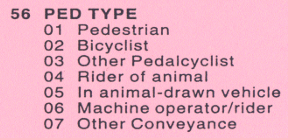

In [9]:
MD_Crash_Person_Data_2017['PED_TYPE_CODE'].value_counts(dropna=False)

PED_TYPE_CODE
NaN     256750
1.0       3599
2.0        847
88.0       399
7.0         40
6.0         21
3.0         14
99.0         5
4.0          3
5.0          1
Name: count, dtype: int64

By looking at the value counts of the pedestrian type data, we can see the different values found in this column. We can see that the vast majority of people attached to crash reports aren't pedestrians due to the 256750 `NaN` values. It's important to note, the documentation tells us that the values `88` and `99` universally refer to 'Other' and 'Unknown'.

Since our question is focused on bicyclists, let's create a dataframe that contains only people with the value of 2, and the corresponding report number.

In [10]:
cyclists=MD_Crash_Person_Data_2017[['REPORT_NO','PED_TYPE_CODE']][MD_Crash_Person_Data_2017['PED_TYPE_CODE']==2].reset_index(drop=True)
cyclists['REPORT_NO'].value_counts()

REPORT_NO
DA40760004     3
MCP3045000J    2
ADJ8870001     2
MCP28820023    2
ADI165003G     2
              ..
ZJ04800017     1
ZL11580005     1
ZVW250000T     1
AC21790004     1
MCP10480036    1
Name: count, Length: 837, dtype: int64

It appears that there are some duplicate report numbers in our data. This could indicate that the crash invovled multiple bicylists, or may indicate that the data is coded incorrectly. Since our question only requires us to identify crashes involving one or more bicyclists, let's remove the duplicate rows from our initial dataset, keeping only the first instance of a report number.

In [11]:
print(cyclists.shape)
cyclists.drop_duplicates('REPORT_NO', inplace=True)
print(cyclists.shape)

(847, 2)
(837, 2)


In [12]:
cyclists['REPORT_NO'].value_counts()

REPORT_NO
DA39010031     1
ADI9280006     1
CT8224000G     1
CT82740056     1
CT8298000Y     1
              ..
ZH0582001W     1
ZJ04800017     1
ZL11580005     1
ZVW250000T     1
MCP10480036    1
Name: count, Length: 837, dtype: int64

We removed 10 duplicate rows from our dataset. We should now have a dataframe containing unique report numbers of crashes involving bicylcists.

Let's begin joining our DataFrames togther on using the common `REPORT_NO`. We'll start by joining the speed limit data from `MD_Crash_Vehicle_Data_2017`

In [13]:
MD_Crash_Vehicle_Data_2017['REPORT_NO'].describe()

count          212791
unique         113170
top       MSP6063006C
freq               15
Name: REPORT_NO, dtype: object

In [14]:
cyclists = cyclists.merge( MD_Crash_Vehicle_Data_2017[['REPORT_NO','SPEED_LIMIT']],
                           on = 'REPORT_NO',
                           how = 'left')
cyclists = cyclists.merge( MD_Crash_Data_2017[['REPORT_NO','COUNTY_NO']],
                           on = 'REPORT_NO',
                           how = 'left')
cyclists.head()

,REPORT_NO,PED_TYPE_CODE,SPEED_LIMIT,COUNTY_NO
0,DA39010031,2.0,15.0,16
1,ADH5090015,2.0,25.0,24
2,ADJ3910047,2.0,30.0,24
3,DA38010021,2.0,10.0,16
4,ADF329000D,2.0,30.0,24


In [15]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REPORT_NO      856 non-null    object 
 1   PED_TYPE_CODE  856 non-null    float64
 2   SPEED_LIMIT    850 non-null    float64
 3   COUNTY_NO      856 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 26.9+ KB


In [16]:
cyclists.REPORT_NO.value_counts()

REPORT_NO
MSP6207003P    3
ADJ733002V     3
ADJ642004W     2
ADJ6080035     2
BX41400010     2
              ..
ZL11580005     1
ZVW250000T     1
AC21790004     1
ADH7370016     1
MCP10480036    1
Name: count, Length: 837, dtype: int64

In [17]:
cyclists[cyclists['REPORT_NO']=='ADJ733002V']

,REPORT_NO,PED_TYPE_CODE,SPEED_LIMIT,COUNTY_NO
678,ADJ733002V,2.0,30.0,24
679,ADJ733002V,2.0,35.0,24
680,ADJ733002V,2.0,30.0,24


It appears when merging our data, we now find rows whwere speed limit is null. We additionally again have duplicate report numbers. Let's clean our new dataframe to remove rows with null values, and keep only the first instance of a report number for our analysis.

In [18]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REPORT_NO      856 non-null    object 
 1   PED_TYPE_CODE  856 non-null    float64
 2   SPEED_LIMIT    850 non-null    float64
 3   COUNTY_NO      856 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 26.9+ KB


In [19]:
cyclists=cyclists[cyclists['SPEED_LIMIT'].notnull()].reset_index(drop = True)
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REPORT_NO      850 non-null    object 
 1   PED_TYPE_CODE  850 non-null    float64
 2   SPEED_LIMIT    850 non-null    float64
 3   COUNTY_NO      850 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 26.7+ KB


In [20]:
print(cyclists.shape)
cyclists.drop_duplicates('REPORT_NO', keep = 'first', inplace=True)
print(cyclists.shape)

(850, 4)
(831, 4)


Let's use our reference material and add the actual county names to the corresponding county codes

In [21]:
county_codes = {1: "Allegany",
                2: "Anne Arundel",
                3: "Baltimore City",
                4: "Baltimore",
                5: "Calvert",
                6: "Caroline",
                7: "Carroll",
                8: "Cecil",
                9: "Charles",
                10: "Dorchester",
                11: "Frederick",
                12: "Garrett",
                13: "Harford",
                14: "Howard",
                15: "Kent",
                16: "Montgomery",
                17: "Prince George's",
                18: "Queen Anne's",
                19: "St. Mary’s",
                20: "Somerset",
                21: "Talbot",
                22: "Washington",
                23: "Wicomico",
                24: "Worcester"}

county_dict = {'COUNTY_NO': [key for key in county_codes.keys()],
               'county': [value for value in county_codes.values()]}

counties = pd.DataFrame(county_dict)
counties

cyclists = cyclists.merge(counties,
               on = 'COUNTY_NO',
               how = 'left')
cyclists['county'].value_counts()

county
Worcester          196
Kent               142
Montgomery         122
Baltimore City      96
Anne Arundel        84
Wicomico            33
Dorchester          27
Talbot              22
Harford             21
Cecil               16
Washington          16
Garrett             15
Caroline             8
Charles              7
Carroll              6
Queen Anne's         5
Somerset             5
Baltimore            4
Allegany             2
Calvert              2
Prince George's      2
Name: count, dtype: int64

Now that we have our cleaned data, let's begin analysis to answer our question:
>Question 4 (15 points)
a. For each county, determine the average speed of accidents involving bicyclists. (Note: Take a look at the Sample Maryland Crash Report. Report provides a map of the codes including those involving other bicyclists.)
b. Sort the list the sorted by average speed.

In [22]:
cyclists['SPEED_LIMIT'].mean()

26.91335740072202

Overall, the average speed of crashes invovling bicylcists is roughly 27 mph. Let's see how this figure varies accross counties

In [23]:
avg_speed=pd.DataFrame(cyclists[['SPEED_LIMIT','county']].groupby(by='county').mean())
avg_speed['accident_count']=cyclists[['REPORT_NO','county']].groupby(by='county').count()
avg_speed.sort_values(by='SPEED_LIMIT', ascending=False, inplace=True)
avg_speed

,SPEED_LIMIT,accident_count
county,,
Calvert,47.500000,2
Queen Anne's,35.000000,5
Caroline,34.375000,8
Somerset,33.000000,5
Wicomico,32.878788,33
Cecil,31.875000,16
Harford,31.666667,21
Washington,29.375000,16
Garrett,29.333333,15


Our data shows us that Calvert County has the highest average speed among crashes invovling bicyclists, while Prince George's County has the lowest average speed. It's also important to note that our counties vary in the number of accidents involving bicyclists. This may represent a data balance issue. 

It is also important to note that we're using the speed limit to assume the speed of the vehicle in the accident. In reality, the vehichle may have been speeding, or going under the speed limit. It may be difficult for law enforcement to collect this data after arriving on the scene of an accident. 

## Question 5

Let's review question 5: 
>Question 5 (15 points)
a. Determine the total number of crashes per "vehicle make". Sort the results in alphabetical order by vehicle make (e.g. Chevrolet, Ford, Honda, etc.).
b. Determine average age of the car involved in these accidents for each "vehicle make".

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| Vehicle Type                      |          5 | MD_Crash_Vehicle_Data_2017 | VEH_MAKE            |
| Year of Manufacture               |          5 | MD_Crash_Vehicle_Data_2017 | VEH_YEAR            |

For this question, we'll need two columns from the vehicle dataset: `VEH_MAKE` and `VEH_YEAR`. Let's create a new dataframe for our relevant data.

In [24]:
vehicles=MD_Crash_Vehicle_Data_2017[['VEH_MAKE','VEH_YEAR']].copy()
vehicles

,VEH_MAKE,VEH_YEAR
0,HYUNDAI,2006.0
1,FORD,2003.0
2,DODGE,2007.0
3,HYUNDAI,2013.0
4,THOM,2007.0
...,...,...
212786,HONDA,2003.0
212787,FORD,2012.0
212788,HONDA,2005.0
212789,CHEVY,1995.0


In [25]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212791 entries, 0 to 212790
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VEH_MAKE  212764 non-null  object 
 1   VEH_YEAR  202506 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


Since we're missing some data from `VEH_YEAR`, let's drop all the rows that are missing a vehicle year

In [26]:
vehicles=vehicles[vehicles['VEH_YEAR'].notnull()].reset_index(drop=True)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202506 entries, 0 to 202505
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VEH_MAKE  202479 non-null  object 
 1   VEH_YEAR  202506 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


There's some additional rows where we have `VEH_YEAR` but missing `VEH_MAKE`. We'll remove these rows as well

In [27]:
vehicles=vehicles[vehicles['VEH_MAKE'].notnull()].reset_index(drop=True)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202479 entries, 0 to 202478
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VEH_MAKE  202479 non-null  object 
 1   VEH_YEAR  202479 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [28]:
vehicles.VEH_YEAR.describe()

count    202479.000000
mean       2001.710568
std         221.090826
min           0.000000
25%        2004.000000
50%        2009.000000
75%        2014.000000
max        9999.000000
Name: VEH_YEAR, dtype: float64

Upon looking at the values for `VEH_YEAR`, we can see there's some years that don't make sense. We should remove the rows with bad data from our dataset.

In [29]:
vehicles.VEH_YEAR.value_counts(bins = [-np.inf,1917,2017,np.inf],
                               sort=False)

(-inf, 1917.0]        1301
(1917.0, 2017.0]    200368
(2017.0, inf]          810
Name: count, dtype: int64

We'll drop all rows that contain a `VEH_YEAR` outside the range of 1917-2017

In [30]:
vehicles=vehicles.loc[(vehicles['VEH_YEAR'] > 1917) & (vehicles['VEH_YEAR'] <= 2017)].reset_index(drop=True)
vehicles.describe()

,VEH_YEAR
count,200368.000000
mean,2008.514628
std,6.079263
min,1919.000000
25%,2004.000000
50%,2009.000000
75%,2014.000000
max,2017.000000


To calculate age of the car, we'll create a derived feature named `age`. Since the data was collected in 2017, we'll subtract the vehicle year from 2017 to calculate the age of the car.

In [31]:
vehicles['age']=2017-vehicles['VEH_YEAR']
vehicles.describe()

,VEH_YEAR,age
count,200368.000000,200368.000000
mean,2008.514628,8.485372
std,6.079263,6.079263
min,1919.000000,0.000000
25%,2004.000000,3.000000
50%,2009.000000,8.000000
75%,2014.000000,13.000000
max,2017.000000,98.000000


Let's take a look at the `VEH_MAKE` data.

In [32]:
pd.set_option('display.max_rows', 75) 
vehicles['VEH_MAKE'].value_counts()

VEH_MAKE
FORD           25419
TOYOTA         19543
HONDA          18717
NISSAN         12102
CHEVY           7997
               ...  
HYANDIA            1
GRDN               1
 NEWFLYER          1
CATERPILLER        1
SUSBARU            1
Name: count, Length: 2600, dtype: int64

It appears there's quite a few typos in our data as well as different coding for the different vehicle makes. Let's see if we can clean some of the rows to make our data more useful.

In [33]:
#removing whitespace
vehicles['VEH_MAKE']=vehicles['VEH_MAKE'].str.strip()
vehicles['VEH_MAKE'].value_counts()

VEH_MAKE
FORD          26253
TOYOTA        20076
HONDA         19378
NISSAN        12609
CHEVY          8343
              ...  
SORENTO           1
DODDGE            1
HERL              1
CHYEVROLET        1
SUSBARU           1
Name: count, Length: 2334, dtype: int64

In an attempt to catch typos and minimize the loss of our data. I created a dictionary based off the stems of the most common vehicle makes found in our data. We then used the `mask()` function to create a boolean index of our column, and then rename the data based of the corresponding value in our dictionary.

In [34]:
stems={  'FOR':'FORD',
         'TOY':'TOYOTA',
         'HON':'HONDA',
         'NIS':'NISSAN',
         'CHEV':'CHEVROLET',
         'DODG':'DODGE',
         'HYU':'HYUNDAI',
         'VOLK':'VW',
         'ACU':'ACURA',
         'LEX':'LEXUS',
         'MAZ':'MAZDA',
         'CHRY':'CHRYSLER',
         'MERC':'MERCEDES BENZ',
         'MERZ':'MERCEDES BENZ',
         'BUIC':'BUICK',
         'CADI':'CADILLAC',
         'INF':'INFINITY',
         'SUZ':'SUZUKI',
         'MITS':'MITSUBISHI'
      }

#Using boolean masking to rename 
for stem in stems.keys():
    vehicles['VEH_MAKE'].mask(vehicles['VEH_MAKE'].str.contains(stem), 
                              other = stems[stem],
                              inplace = True)
        
vehicles['VEH_MAKE'].value_counts()

VEH_MAKE
TOYOTA          26767
FORD            26295
HONDA           23086
CHEVROLET       20708
NISSAN          15688
                ...  
PAIG                1
GILLID              1
COBRA               1
SPARTAN/ROSE        1
SUSBARU             1
Name: count, Length: 1845, dtype: int64

Although not perfect, we managed to aggregate some of the most common typos found within the `VEH_MAKE` column. From here, let's limit our data to the only the rows that contain one of the top 15 most common vehicle makes.

In [35]:
top_makes = list(vehicles['VEH_MAKE'].value_counts()[:15].index)
top_makes

['TOYOTA',
 'FORD',
 'HONDA',
 'CHEVROLET',
 'NISSAN',
 'DODGE',
 'HYUNDAI',
 'JEEP',
 'MERCEDES BENZ',
 'ACURA',
 'CHRYSLER',
 'KIA',
 'VW',
 'LEXUS',
 'MAZDA']

In [36]:
vehicles=vehicles[vehicles['VEH_MAKE'].isin(top_makes)].reset_index(drop=True)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162656 entries, 0 to 162655
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VEH_MAKE  162656 non-null  object 
 1   VEH_YEAR  162656 non-null  float64
 2   age       162656 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.7+ MB


now that we've created a clean dataset, let's answer our question:

>Question 5 (15 points)
a. Determine the total number of crashes per "vehicle make". Sort the results in alphabetical order by vehicle make (e.g. Chevrolet, Ford, Honda, etc.).
b. Determine average age of the car involved in these accidents for each "vehicle make".

In [37]:
veh_stats = pd.DataFrame()
veh_stats = vehicles[['VEH_MAKE','age']].groupby('VEH_MAKE').mean()
veh_stats['crash_count']=vehicles['VEH_MAKE'].value_counts()
veh_stats.rename(columns = {'age':'Avg Age',
                            'crash_count':'Total Crashes'},
                 inplace = True)
veh_stats

,Avg Age,Total Crashes
VEH_MAKE,,
ACURA,10.288185,4105
CHEVROLET,8.754443,20708
CHRYSLER,8.113977,3799
DODGE,8.502831,9359
FORD,8.645522,26295
HONDA,9.093823,23086
HYUNDAI,5.627875,8739
JEEP,7.844715,5345
KIA,5.321447,3786


## Question 6

Let's review Question 6:
>Question 6 (15 points)
a. Determine all the accidents that happened in a circle centered at (39.197753, -77.263303) with a radius of 5 km.
b. Determine the number of accidents where the speed limit was above 51 miles per hour within the 5 km circle.
c. Determine the number of accidents where the speed limit was below 41 miles per hour within the 5 km circl.

Hint: Please see the "P1_Helper_Distance_From_Coordinates.ipynb" that can be found in the Project1 folder.

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| Location of Accident              |          6 | MD_Crash_Data_2017         | LATITUDE            |
| Location of Accident              |          6 | MD_Crash_Data_2017         | LONGITIUDE          |
| Speed Limit                       |          6 | MD_Crash_Vehicle_Data_2017         | SPEED_LIMIT       |

In [38]:
crash_loc = MD_Crash_Data_2017[['REPORT_NO','LATITUDE','LONGITUDE']].copy()
crash_loc = crash_loc.merge(MD_Crash_Vehicle_Data_2017[['REPORT_NO','SPEED_LIMIT']],
                on='REPORT_NO')
crash_loc.head()

,REPORT_NO,LATITUDE,LONGITUDE,SPEED_LIMIT
0,BK02110007,39.643784,-75.877094,25
1,BK02110007,39.643784,-75.877094,25
2,MCP2964000H,39.265245,-77.215697,25
3,MCP2964000H,39.265245,-77.215697,25
4,CP0138000K,38.947928,-76.962365,20


In [39]:
crash_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212791 entries, 0 to 212790
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   REPORT_NO    212791 non-null  object 
 1   LATITUDE     212791 non-null  float64
 2   LONGITUDE    212791 non-null  float64
 3   SPEED_LIMIT  212791 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 6.5+ MB


In [40]:
#Dropping duplicate rows
crash_loc.drop_duplicates(subset='REPORT_NO', inplace=True)
crash_loc.reset_index(inplace=True, drop=True)
crash_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113170 entries, 0 to 113169
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   REPORT_NO    113170 non-null  object 
 1   LATITUDE     113170 non-null  float64
 2   LONGITUDE    113170 non-null  float64
 3   SPEED_LIMIT  113170 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.5+ MB


In [41]:
crash_loc['REPORT_NO'].value_counts().head()

REPORT_NO
BK02110007     1
ZF0506000H     1
AE50140029     1
MCP2386001R    1
DA3772001Q     1
Name: count, dtype: int64

In [42]:
crash_loc.describe()

,LATITUDE,LONGITUDE,SPEED_LIMIT
count,113170.000000,113170.000000,113170.000000
mean,39.146392,-76.748894,33.881859
std,0.309311,0.470626,15.884822
min,37.500000,-79.900000,0.000000
25%,38.984481,-76.946585,25.000000
50%,39.221252,-76.714607,35.000000
75%,39.347799,-76.577278,45.000000
max,39.968701,-75.036621,75.000000


### Determining Distance

Now that we have a cleaned dataset containing only unique report numbers, the next step is to create a derived feature, distance, to determine the distance from our center point. From there, we can select only the rows that are within 5km for our analysis. 

In [43]:
#Distance from coordinates function
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2-lat1)
   delta_lambda = np.radians(lon2-lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))
   return np.round(res, 2)

In [44]:
cent_lat = 39.197753
cent_long = -77.263303

crash_loc['distance']=haversine_distance(cent_lat, cent_long, crash_loc['LATITUDE'],crash_loc['LONGITUDE'])
crash_loc.describe()

,LATITUDE,LONGITUDE,SPEED_LIMIT,distance
count,113170.000000,113170.000000,113170.000000,113170.000000
mean,39.146392,-76.748894,33.881859,59.909974
std,0.309311,0.470626,15.884822,35.272583
min,37.500000,-79.900000,0.000000,0.020000
25%,38.984481,-76.946585,25.000000,41.990000
50%,39.221252,-76.714607,35.000000,54.360000
75%,39.347799,-76.577278,45.000000,65.820000
max,39.968701,-75.036621,75.000000,265.230000


We'll create a new dataframe that contains only the crashes with distance value less than or equal to 5km.

In [45]:
close_crashes = crash_loc[crash_loc['distance'] <= 5].reset_index(drop=True)
close_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REPORT_NO    1164 non-null   object 
 1   LATITUDE     1164 non-null   float64
 2   LONGITUDE    1164 non-null   float64
 3   SPEED_LIMIT  1164 non-null   int64  
 4   distance     1164 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 45.6+ KB


<Axes: >

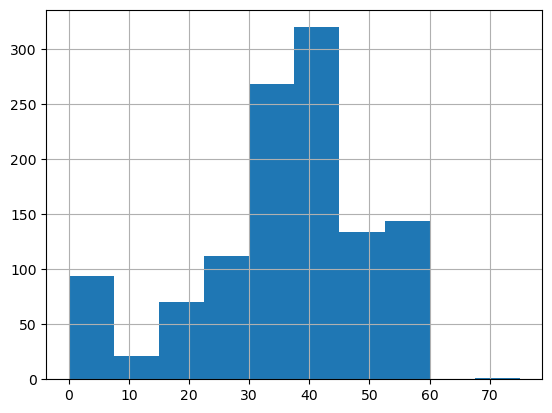

In [46]:
close_crashes['SPEED_LIMIT'].hist()

A speed limit value of '0' may mean that the speed limit was unknown, or that there was no speed limit posted, for example, crashes that occur in parking lots.

In [47]:
close_crashes['SPEED_LIMIT'].value_counts().sort_index()

SPEED_LIMIT
0      64
5      30
10     21
15     60
20     10
25    112
30    128
35    140
40    320
45    116
50     18
55    144
75      1
Name: count, dtype: int64

In [48]:
close_crashes['SPEED_LIMIT'].value_counts(bins=[-1,41,51,80], sort=False)

(-1.001, 41.0]    885
(41.0, 51.0]      134
(51.0, 80.0]      145
Name: count, dtype: int64

Within our defined circle, there was a total of 1164 unique accidents. 885 of those accidents the speed limit was 41mph or under. 145 of those accidents had a speed limit above 51mph. The majority of the accidents in our circle occured at relatively lower speeds.

## Question 7

Let's review the question 7 data:

>Determine the number of drivers, who got in a car crash, from non-DMV states and list them by total drivers, female and male. Consollidate the final values in one dataframe.

(example)

| St | Drivers | Female | Male | 
|---|---|---|---|
|NY | 151034  | 101000 | 50034|
|PA | 125131  | 105000 | 20131|

>b. Use the states drivers data from the states_drivers.csv to normalize the previous list with number of total drivers for each state. For example, there are 12 million drivers in NY, then the normalized numbers should be:

St |  Drivers  | Normalized
|---|---|---|
NY |  151034   | 1.26E-5   
PA |  125131   |....       


Let's take a look at our reference table to see which dataset contains our relevant info:

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| Driver State of Origin            |          7 | MD_Crash_Person_Data_2017  | LICENSE_STATE_CODE |
| Driver Gender                     |          7 | MD_Crash_Person_Data_2017  | SEX_CODE            |

In [49]:
drivers=MD_Crash_Person_Data_2017[['LICENSE_STATE_CODE','SEX_CODE']]
drivers.head()

,LICENSE_STATE_CODE,SEX_CODE
0,PA,F
1,MD,F
2,MD,F
3,MD,F
4,MD,F


Since we're trying to remove non-DMV states, lets drop the rows from DC, MD, and VA

In [50]:
out_of_state_drivers=drivers[~drivers.LICENSE_STATE_CODE.isin(['DC','MD','VA'])]
out_of_state_drivers.reset_index(drop=True, inplace = True)
out_of_state_drivers['LICENSE_STATE_CODE'].value_counts()

LICENSE_STATE_CODE
PA    4345
DE    1823
XX    1232
WV    1142
FL    1135
NY     968
NJ     854
NC     818
MA     619
TX     448
GA     390
CA     373
OH     311
SC     284
MI     174
TN     171
CT     159
IL     158
US     127
WA     118
AZ     113
AL      97
LA      96
ME      91
IN      88
CO      87
MB      79
KY      74
MH      64
MO      56
MS      52
OK      48
UT      48
NV      44
WI      44
NM      42
KS      40
AR      38
MN      38
OR      36
NH      35
IA      34
ND      34
RI      31
ON      30
AK      30
VT      26
HI      23
QC      22
ID      19
PR      14
SD      14
NE      14
MT      12
WY       8
AB       6
NB       6
VI       4
BC       3
UM       3
SK       3
YT       3
PE       2
GU       1
NS       1
PQ       1
NU       1
IT       1
NT       1
Name: count, dtype: int64

In [51]:
out_of_state_drivers['SEX_CODE'].value_counts()

SEX_CODE
M    43400
F    38842
U     1218
Name: count, dtype: int64

It appears our data contains 1269 rows where gender is unknown, since we're not factoring in unknown gender into our answer, lets remove the rows that have a value of `U` for gender.

In [52]:
out_of_state_drivers=out_of_state_drivers[out_of_state_drivers['SEX_CODE'] != 'U'].reset_index(drop=True)

Let's create a new dataframe that contains the the total MD crashes from each state, the total crashed from each state by male and female drivers.

In [53]:
oos_drivers_by_gender = pd.DataFrame(out_of_state_drivers['LICENSE_STATE_CODE'].value_counts().copy())
male_drivers = out_of_state_drivers[out_of_state_drivers['SEX_CODE'] == 'M'].groupby('LICENSE_STATE_CODE').count()
oos_drivers_by_gender['male'] = male_drivers
oos_drivers_by_gender.head()

,count,male
LICENSE_STATE_CODE,,
PA,4321,2936.0
DE,1812,1133.0
WV,1139,721.0
FL,1129,737.0
XX,1091,779.0


In [54]:
female_drivers = out_of_state_drivers[out_of_state_drivers['SEX_CODE'] == 'F'].groupby('LICENSE_STATE_CODE').count()
oos_drivers_by_gender['female'] = female_drivers
oos_drivers_by_gender.head()

,count,male,female
LICENSE_STATE_CODE,,,
PA,4321,2936.0,1385.0
DE,1812,1133.0,679.0
WV,1139,721.0,418.0
FL,1129,737.0,392.0
XX,1091,779.0,312.0


Now that we have our the total crash count, and count per gender for each state, let's take a look at the data from `states_drivers` so we can normalize our data

In [55]:
states_drivers.head()

,STATE,MALE,FEMALE
0,Alabama,"1,896,942","2,010,096"
1,Alaska,"251,993","281,234"
2,Arizona,"2,502,985","2,475,777"
3,Arkansas,"1,041,548","1,078,030"
4,California,"12,968,614","12,564,306"


Before we move on, we need to convert our the state names to their abbreviations, we'll do this by referencing our `states` that contains all of the state names and their abbreviations so we can join our data with the data in `oos_drivers_by_gender`

In [56]:
states.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [57]:
states=states.rename(columns={'State':'STATE',
                       'Abbrev':'ABBREV',
                       'Code':'CODE'})
states.head()

,STATE,ABBREV,CODE
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In order to join the data correctly, had to use the .strip() string operator to remove whitespaces around the state code

In [58]:
states_drivers['STATE']=states_drivers['STATE'].str.strip()
states_drivers = states_drivers.merge(states,how='left',on='STATE')
states_drivers.head()

,STATE,MALE,FEMALE,ABBREV,CODE
0,Alabama,"1,896,942","2,010,096",Ala.,AL
1,Alaska,"251,993","281,234",Alaska,AK
2,Arizona,"2,502,985","2,475,777",Ariz.,AZ
3,Arkansas,"1,041,548","1,078,030",Ark.,AR
4,California,"12,968,614","12,564,306",Calif.,CA


In [59]:
states_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   51 non-null     object
 1   MALE    51 non-null     object
 2   FEMALE  51 non-null     object
 3   ABBREV  50 non-null     object
 4   CODE    50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


We need to convert the `MALE` and `FEMALE` columns to numeric columns

In [60]:
cols=['MALE','FEMALE']

for col in cols:
    states_drivers[col]=states_drivers[col].str.strip()
    states_drivers[col]=states_drivers[col].str.replace(',','')
    states_drivers[col]=states_drivers[col].astype(int)

states_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   51 non-null     object
 1   MALE    51 non-null     int32 
 2   FEMALE  51 non-null     int32 
 3   ABBREV  50 non-null     object
 4   CODE    50 non-null     object
dtypes: int32(2), object(3)
memory usage: 1.7+ KB


In [61]:
states_drivers['TOTAL']=states_drivers['MALE']+states_drivers['FEMALE']
states_drivers.head()

,STATE,MALE,FEMALE,ABBREV,CODE,TOTAL
0,Alabama,1896942,2010096,Ala.,AL,3907038
1,Alaska,251993,281234,Alaska,AK,533227
2,Arizona,2502985,2475777,Ariz.,AZ,4978762
3,Arkansas,1041548,1078030,Ark.,AR,2119578
4,California,12968614,12564306,Calif.,CA,25532920


We now have a seperate dataframe that contains data on the total drivers from each state and their gender. We will now join the data from our MD crash reports and the outside data into one dataframe so we can normalize our data

In [62]:
states_drivers=states_drivers.merge(oos_drivers_by_gender, left_on='CODE', right_on='LICENSE_STATE_CODE')

In [63]:
cols={'STATE':'state',
         'MALE':'tot_m',
         'FEMALE':'tot_f',
         'ABBREV':'abbrev',
         'CODE':'state_code',
         'TOTAL':'state_tot',
         'count':'md_tot',
         'male':'md_male',
         'female':'md_female'}
states_drivers=states_drivers.rename(columns=cols)
states_drivers.head()

,state,tot_m,tot_f,abbrev,state_code,state_tot,md_tot,md_male,md_female
0,Alabama,1896942,2010096,Ala.,AL,3907038,97,74.0,23.0
1,Alaska,251993,281234,Alaska,AK,533227,30,18.0,12.0
2,Arizona,2502985,2475777,Ariz.,AZ,4978762,112,70.0,42.0
3,Arkansas,1041548,1078030,Ark.,AR,2119578,38,23.0,15.0
4,California,12968614,12564306,Calif.,CA,25532920,372,215.0,157.0


In [64]:
states_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       48 non-null     object 
 1   tot_m       48 non-null     int32  
 2   tot_f       48 non-null     int32  
 3   abbrev      48 non-null     object 
 4   state_code  48 non-null     object 
 5   state_tot   48 non-null     int32  
 6   md_tot      48 non-null     int64  
 7   md_male     48 non-null     float64
 8   md_female   48 non-null     float64
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 2.9+ KB


The next step is to create normalized columns from the totals

In [65]:
states_drivers['tot_normalized']=states_drivers['md_tot']/states_drivers['state_tot']
states_drivers['m_normalized']=states_drivers['md_male']/states_drivers['tot_m']
states_drivers['f_normalized']=states_drivers['md_female']/states_drivers['tot_f']
states_drivers.head()
                                                                

,state,tot_m,tot_f,abbrev,state_code,state_tot,md_tot,md_male,md_female,tot_normalized,m_normalized,f_normalized
0,Alabama,1896942,2010096,Ala.,AL,3907038,97,74.0,23.0,0.000025,0.000039,0.000011
1,Alaska,251993,281234,Alaska,AK,533227,30,18.0,12.0,0.000056,0.000071,0.000043
2,Arizona,2502985,2475777,Ariz.,AZ,4978762,112,70.0,42.0,0.000022,0.000028,0.000017
3,Arkansas,1041548,1078030,Ark.,AR,2119578,38,23.0,15.0,0.000018,0.000022,0.000014
4,California,12968614,12564306,Calif.,CA,25532920,372,215.0,157.0,0.000015,0.000017,0.000012


For clarity, let's select the columns we're interested so we can reference our final dataframe for this question.

In [66]:
state_gender_stats=states_drivers[['state_code','md_tot','md_male','md_female','tot_normalized','m_normalized','f_normalized']].copy()
state_gender_stats

,state_code,md_tot,md_male,md_female,tot_normalized,m_normalized,f_normalized
0,AL,97,74.0,23.0,0.000025,0.000039,0.000011
1,AK,30,18.0,12.0,0.000056,0.000071,0.000043
2,AZ,112,70.0,42.0,0.000022,0.000028,0.000017
3,AR,38,23.0,15.0,0.000018,0.000022,0.000014
4,CA,372,215.0,157.0,0.000015,0.000017,0.000012
5,CO,87,55.0,32.0,0.000022,0.000027,0.000017
6,CT,158,99.0,59.0,0.000062,0.000078,0.000045
7,DE,1812,1133.0,679.0,0.002440,0.003139,0.001779
8,FL,1129,737.0,392.0,0.000079,0.000105,0.000054
9,GA,387,245.0,142.0,0.000056,0.000074,0.000039


## Question 8

In this question, we need to analyze times and dates

>a. On which day of the week (Monday through Sunday) do the most of the crashes happen?
b. On which hour of the day (00 - 24) do the most of the crashes happen?

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| Time of Accident                  |          8 | MD_Crash_Data_2017         | ACC_TIME            |
| Date of Accident                  |          8 | MD_Crash_Data_2017         | ACC_DATE            |
| Day of Week                       |          8 | MD_Crash_Data_2017         | ACC_DATE            |

Let's begin by creating a new dataframe with the above columns along with unique report numbers

In [67]:
acc_times=MD_Crash_Data_2017[['REPORT_NO','ACC_DATE','ACC_TIME']].copy()
acc_times.drop_duplicates('REPORT_NO',inplace=True)
acc_times.reset_index(inplace=True)
acc_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113192 entries, 0 to 113191
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   index      113192 non-null  int64         
 1   REPORT_NO  113192 non-null  object        
 2   ACC_DATE   113192 non-null  datetime64[ns]
 3   ACC_TIME   113192 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.5+ MB


In [68]:
#Checking for duplicate report numbers, we want only unique report numbers, so crash data isn't counted more than once
acc_times.REPORT_NO.value_counts().head()

REPORT_NO
BK02110007    1
AC16340008    1
DA31200007    1
AE5442001Z    1
AE50140029    1
Name: count, dtype: int64

In [69]:
acc_times.head()

,index,REPORT_NO,ACC_DATE,ACC_TIME
0,0,BK02110007,2017-03-12,00:59:00
1,1,MCP2964000H,2017-02-09,16:08:00
2,2,CP0138000K,2017-03-03,08:00:00
3,3,DE3160001J,2017-01-09,16:14:00
4,4,MCP2195000B,2017-03-22,05:34:00


Let's create a new column that combines both the accident date and accident time, then convert it to a single datetime object for our analysis

In [70]:
acc_times['ACC_DATE']=acc_times['ACC_DATE'].astype(str)
acc_times['ACC_TIME']=acc_times['ACC_TIME'].astype(str)
acc_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113192 entries, 0 to 113191
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   index      113192 non-null  int64 
 1   REPORT_NO  113192 non-null  object
 2   ACC_DATE   113192 non-null  object
 3   ACC_TIME   113192 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.5+ MB


We converted both of our columns to strings, next we'll concatenate the strings into the new column `date_and_time`

In [71]:
acc_times['date_and_time']=acc_times['ACC_DATE'] + ' ' + acc_times['ACC_TIME']

In [72]:
acc_times.head()

,index,REPORT_NO,ACC_DATE,ACC_TIME,date_and_time
0,0,BK02110007,2017-03-12,00:59:00,2017-03-12 00:59:00
1,1,MCP2964000H,2017-02-09,16:08:00,2017-02-09 16:08:00
2,2,CP0138000K,2017-03-03,08:00:00,2017-03-03 08:00:00
3,3,DE3160001J,2017-01-09,16:14:00,2017-01-09 16:14:00
4,4,MCP2195000B,2017-03-22,05:34:00,2017-03-22 05:34:00


In [73]:
acc_times['date_and_time'] = pd.to_datetime(acc_times['date_and_time'], format = '%Y-%m-%d %H:%M:%S')
acc_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113192 entries, 0 to 113191
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   index          113192 non-null  int64         
 1   REPORT_NO      113192 non-null  object        
 2   ACC_DATE       113192 non-null  object        
 3   ACC_TIME       113192 non-null  object        
 4   date_and_time  113192 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.3+ MB


In [74]:
acc_times['date_and_time'].describe()

count                           113192
mean     2017-07-07 04:12:36.102198016
min                2017-01-01 00:00:00
25%                2017-04-09 14:11:30
50%                2017-07-08 20:23:30
75%                2017-10-07 16:42:30
max                2017-12-31 23:52:00
Name: date_and_time, dtype: object

<Axes: >

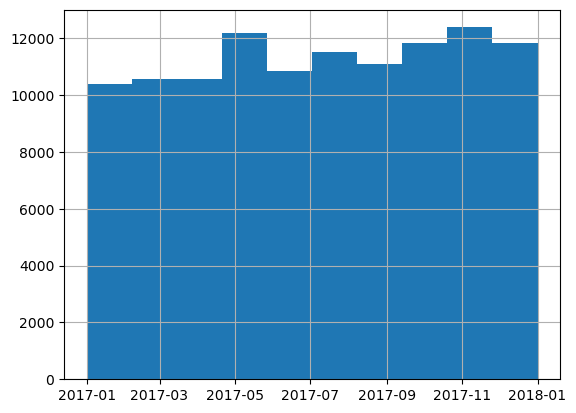

In [75]:
acc_times['date_and_time'].hist()

Our first question is: _On which day of the week (Monday through Sunday) do the most of the crashes happen?_

In [76]:
acc_times['date_and_time'].dt.day_name().value_counts()

date_and_time
Friday       17957
Thursday     16750
Tuesday      16489
Wednesday    16299
Saturday     16172
Monday       15756
Sunday       13769
Name: count, dtype: int64

It appears that Friday is the most common day of week that crashes occured

the next part of the question is : _On which hour of the day (00 - 24) do the most of the crashes happen?_

<Axes: >

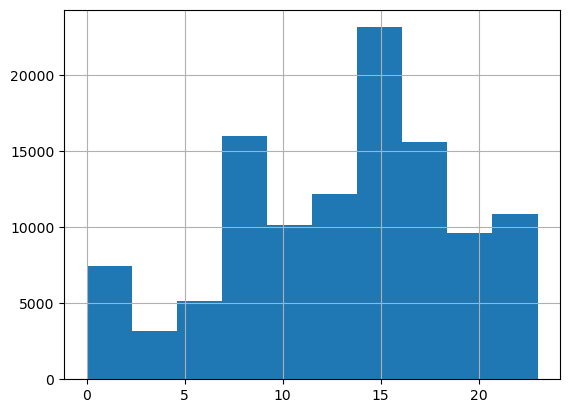

In [77]:
acc_times['date_and_time'].dt.hour.hist()

In [78]:
acc_times['date_and_time'].dt.hour.value_counts()

date_and_time
17    8477
16    8228
15    7996
18    7135
14    6891
12    6150
13    5991
8     5898
19    5279
11    5252
9     5145
7     4912
10    4847
20    4336
21    4062
22    3588
6     3271
23    3191
0     2865
1     2337
2     2260
5     1884
3     1684
4     1513
Name: count, dtype: int64

The most common hour for accidents is 5pm, which is reasonable when considering rush hour traffic

## Question 9

Let's review question 9: 

>a. What is the number of accidents that happened on rainy and clear/cloudy days? b. What is the ration of the number of accidents that happened on rainy days to the number of accidents happened on clear/cloudy days? c. Calculate the number of fatal accidents that occur by each light condition.

>What does these statistics tell us?

Again, let's review our reference table to determine where we can find our relevant data sources:

| Info Needed                       |   Question | Dataset                    | Column              |
|:----------------------------------|:----------:|:--------------------------:|:-------------------:|
| Weather Condition                 |          9 | MD_Crash_Data_2017         | WEATHER_CODE        |
| Light  Condition                            |          9 | MD_Crash_Data_2017         | LIGHT_CODE          |
| Accident Fatality/Severity Rating |          9 | MD_Crash_Person_Data_2017  | INJ_SEVER_CODE      |

In [79]:
acc_weather = MD_Crash_Data_2017[['REPORT_NO','WEATHER_CODE','LIGHT_CODE']].copy()
acc_weather.head()

,REPORT_NO,WEATHER_CODE,LIGHT_CODE
0,BK02110007,6.01,3.0
1,MCP2964000H,6.01,1.0
2,CP0138000K,6.01,1.0
3,DE3160001J,7.01,3.0
4,MCP2195000B,6.01,3.0


The reference material provides context for how our data is coded for both weather and light:

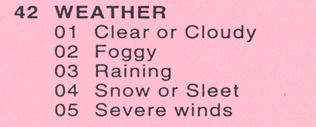  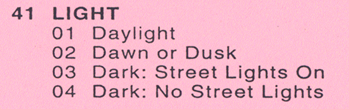

In [80]:
acc_weather['WEATHER_CODE'].value_counts().sort_index()

WEATHER_CODE
0.00     13347
2.00       686
3.00     13791
5.00       145
6.01     71746
7.01     10169
8.04      1470
9.04       148
10.04       96
11.88        2
12.04      329
88.00      317
99.00      946
Name: count, dtype: int64

In [81]:
acc_weather['LIGHT_CODE'].value_counts().sort_index()

LIGHT_CODE
0.00      1832
1.00     68680
3.00     25648
4.00      8096
5.02      2530
6.02      2887
7.88      1558
88.00      332
99.00     1629
Name: count, dtype: int64

According to our reference guide, values for `WEATHER_CODE` should only be in the range of 1-5. and light code should only contain values between 1-4. So this is an indication about errors in data collection. For the purpose of this question, we'll assume that a weather code of `00` will be equivelent to 'No inclimate weather detected' 

In [82]:
acc_weather = acc_weather[(acc_weather['WEATHER_CODE'] >= 0) & (acc_weather['WEATHER_CODE'] <= 5)] 
acc_weather = acc_weather[(acc_weather['LIGHT_CODE'] >= 0) & (acc_weather['LIGHT_CODE'] <= 4)]
acc_weather.reset_index(drop = True, inplace=True)
acc_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25425 entries, 0 to 25424
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   REPORT_NO     25425 non-null  object 
 1   WEATHER_CODE  25425 non-null  float64
 2   LIGHT_CODE    25425 non-null  float64
dtypes: float64(2), object(1)
memory usage: 596.0+ KB


_a. What is the number of accidents that happened on rainy and clear/cloudy days?_

In [83]:
acc_weather.WEATHER_CODE.value_counts()

WEATHER_CODE
3.0    12715
0.0    11994
2.0      578
5.0      138
Name: count, dtype: int64

Out of 25425 total crashes, 12715 of the crashes occured on rainy days (weather code 3). 11994 of the crashes occured on clear/cloudy days (weather code 0).


 _b. What is the ratio of the number of accidents that happened on rainy days to the number of accidents happened on clear/cloudy days?_

In [84]:
round(acc_weather.WEATHER_CODE.value_counts()[3]/acc_weather.WEATHER_CODE.value_counts()[0],2)

1.06

The ratio of rainy day accidents to clear/cloudy day accidents is 1.06 , which means that rainy day and clear/cloudy accidents occured at roughly the same rate. 

the next part of our question is:

_c. Calculate the number of fatal accidents that occur by each light condition._

In [85]:
acc_injuries=acc_weather.merge(MD_Crash_Person_Data_2017[['REPORT_NO','INJ_SEVER_CODE']],
                              on = 'REPORT_NO',
                              how = 'left')
acc_injuries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57573 entries, 0 to 57572
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REPORT_NO       57573 non-null  object 
 1   WEATHER_CODE    57573 non-null  float64
 2   LIGHT_CODE      57573 non-null  float64
 3   INJ_SEVER_CODE  57331 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.8+ MB


In [86]:
acc_injuries = acc_injuries[acc_injuries['INJ_SEVER_CODE'].notnull()]

For reference, here's the codes for INJ_SEVER_CODE: 

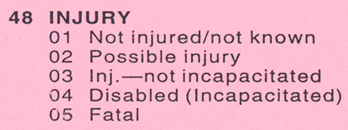

In [87]:
acc_injuries['INJ_SEVER_CODE'].value_counts()

INJ_SEVER_CODE
1.0    46324
2.0     6857
3.0     3497
4.0      581
5.0       72
Name: count, dtype: int64

In [88]:
fatal_acc = acc_injuries[acc_injuries['INJ_SEVER_CODE'] == 5].reset_index(drop=True)
fatal_acc['LIGHT_CODE'].value_counts()

LIGHT_CODE
1.0    31
3.0    24
4.0    16
0.0     1
Name: count, dtype: int64

According to our data, there were 40 fatal accidents that occured in dark conditions (light code 3 and 4) compared to daylight (light code 1) which had 31 fatal accidents.

_What do these statistics tell us?_

According to our data, accidents occur at relatively the same rate between clear and cloudy days and fatal accidents are slightly more common in the dark compared to daylight. Due to the issues in coding for weather code and light code, I am hesitant to make any strong conclusions regarding this dataset when it comes to weather and light.

## Question 10

_Use matplotlib and/or seaborn and show your talent in data visualization. You are free to visualize anything you want regarding this dataset._

For our visualization, let's return to question 7 where we determined the number of drivers from each state who were involved in a MD crash. In our analysis, we created a column `tot_normalized` which was a ratio of drivers involved in a MD crash to the state's total drivers. This ratio can show _how likely a driver from a given state ends up in a Maryland crash_. 

Our goal is to create a heatmap that will help us visualize which states have a higher `tot_normalized` value. The drivers from those states are the ones we need to be wary of when driving in MD. 

### Geopandas

[Geopandas](https://geopandas.org/en/stable/) is a library that allows for plotting of geospacial data. For our visualization, we'll use this library to create a heatmap in the shape of the United States.

[Here's an article I used to help create this visualization](https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6)

In [89]:
#installing and importing the geopandas library
#pip install geopandas

In [90]:
import geopandas

Geopandas requires a `.shp` file in order to understand the shapes of terratories. Shape files are available to download from the [US Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html) website.

<Axes: >

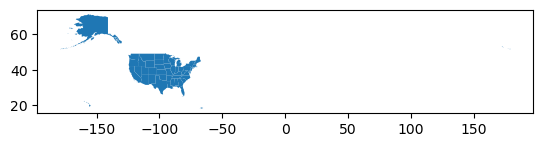

In [91]:
states = geopandas.read_file(r"C:\Users\peted\OneDrive\Documents\Data\DATA 601\Projects\Project 1\input_data\geodata\cb_2018_us_state_20m.shp")
states.plot()

Geopandas creates an object that's similar to a DataFrame called a GeoDataFrame where we can include our data from question 7.

In [92]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77926, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.7222, -75.75323 39.7579..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


Since we excluded data from MD, VA, and DC from our analysis before, let's re-incorporate that data into our visualization

In [93]:
dmv = pd.DataFrame(drivers[drivers['LICENSE_STATE_CODE'].isin(['MD','VA','DC'])]['LICENSE_STATE_CODE'].value_counts())
dmv.reset_index(inplace = True)
dmv['tot_drivers'] = [4185752,5820209,455602]
dmv['tot_normalized'] = dmv['count']/dmv['tot_drivers']
dmv = dmv.rename(columns={'LICENSE_STATE_CODE':'state_code','tot_drivers':'state_tot','count':'md_tot'})
dmv

,state_code,md_tot,state_tot,tot_normalized
0,MD,151781,4185752,0.036261
1,VA,4964,5820209,0.000853
2,DC,3696,455602,0.008112


In [94]:
#Adding DC,MD,VA data into our states_drivers dataframe from before
states_drivers=pd.concat([states_drivers,dmv], axis=0)

We'll now join our states_drivers data into our `states` GeoDateFrame

In [95]:
states = states.merge(states_drivers[['state_code','tot_normalized']], left_on='STUSPS', right_on='state_code')

In [96]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state_code,tot_normalized
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",MD,0.036261
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77926, -96.57794 42.827...",IA,0.000015
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.7222, -75.75323 39.7579...",DE,0.002440
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",OH,0.000039
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",PA,0.000483


In [97]:
states['tot_normalized'].describe()

count    51.000000
mean      0.000997
std       0.005173
min       0.000010
25%       0.000019
50%       0.000026
75%       0.000070
max       0.036261
Name: tot_normalized, dtype: float64

<Axes: >

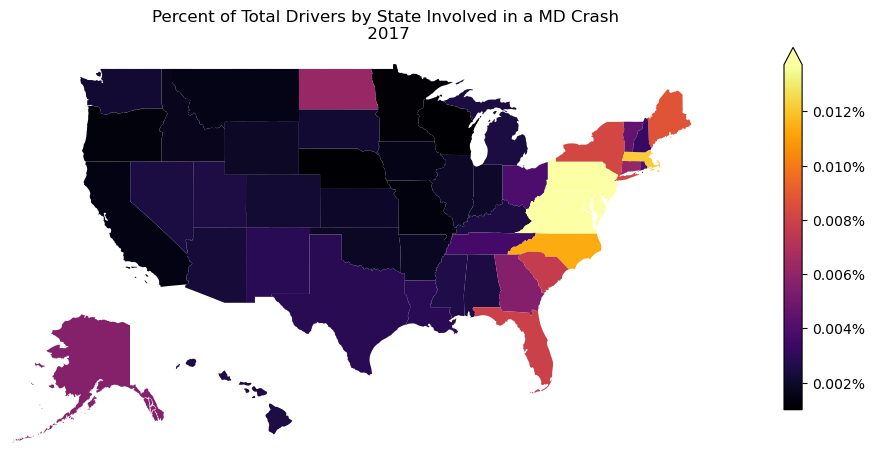

In [98]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(16,16))

ax1, ax2, ax3 = axs

#Setting AK limits and location on figure
ax1.set_xlim(-180,-128)
ax1.set_ylim(50,72)
ax1.set_position([0.3, 0.35, 0.10, 0.10])

#Setting HI limits and location on figure
ax3.set_position([0.4, 0.35, 0.08, 0.08])

ax2.set_title("Percent of Total Drivers by State Involved in a MD Crash\n 2017")

#turning x and y axis off
for ax in axs:
    ax.axis('off')

#Creating a function to format our legend ticks using FuncFormatter
def to_percent(x, pos):
    return f"{x * 100:.3f}%"

#plotting AK data
states[states['STUSPS'] == 'AK'].plot(
            column='tot_normalized',
            cmap='inferno',
            vmin=states['tot_normalized'].min(),
            vmax=states['tot_normalized'].quantile(.88),
            autolim=False,
            ax=ax1
            )

#plotting lower 48 states data
states[~states['STUSPS'].isin(['HI','AK'])].plot(
            column='tot_normalized',
            cmap='inferno',
            vmin=states['tot_normalized'].min(),
            vmax=states['tot_normalized'].quantile(.88),
            autolim=True,
            legend=True,
            legend_kwds={'format':FuncFormatter(to_percent),
                         'extend':'max'},
            ax=ax2
            )

#plotting HI data
states[states['STUSPS'] == 'HI'].plot(
            column='tot_normalized',
            cmap='inferno',
            vmin=states['tot_normalized'].min(),
            vmax=states['tot_normalized'].quantile(.88),
            autolim=True,
            ax=ax3
            )




Our visualization shows us that states bordering MD are more likely to be in a MD crash. Following that, the states along the atlantic also have a higher probability such as North Carolina and Massachusets. Interestingly Florida drivers have a higher probability of accidents compared to Georgia. North Dakota and Alaska also stand out, which is likely due to the low amount of total drivers from those states.

# NOTEBOOK END